In [1]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
risk = pd.read_csv('../data/Credit_risk_preprocessed.csv')
risk.loc[risk['age']<0, 'age'] = None
risk = risk.dropna()
risk['age'] = risk['age'].astype('int64', copy = False)
risk.head(10)


,clientid,income,age,loan,default
0,1,66155,87,8106,0
1,2,34415,76,6564,0
2,3,57317,91,8020,0
3,4,42709,73,6103,0
4,5,66952,46,8770,1
5,6,24904,85,15,0
6,7,48430,54,5722,0
7,8,24500,60,2971,1
8,9,40654,83,4755,0
9,10,25075,67,1409,0


In [3]:
array = risk.values
array

array([[    1, 66155,    87,  8106,     0],
       [    2, 34415,    76,  6564,     0],
       [    3, 57317,    91,  8020,     0],
       ...,
       [ 1998, 44311,    56,  5522,     1],
       [ 1999, 43756,    91,  1622,     0],
       [ 2000, 69436,    84,  7378,     0]], dtype=int64)

# 1. Одномерный отбор признаков

In [4]:
X = array[:,1:4]
Y = array[:,4]
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5,:])

[4.7e+01 1.0e+03 5.9e+05]
[[66155    87  8106]
 [34415    76  6564]
 [57317    91  8020]
 [42709    73  6103]
 [66952    46  8770]]


Мы видим оценки для каждого признакак с наивысшими оценками являются заработок клиента и сумма кредита.

# 2. Рекурсивное исключение признаков

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [6]:
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  1
Selected Features:  [False  True False]
Feature Ranking:  [3 1 2]


C:\Users\kgubk\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Мы видим что в результате был отобран 1 лучший призак возраст

# 3. Отбор на основе важности признаков

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.2 0.4 0.4]


Мы получили оценки для каждого признака. Чем больше значение оценки, тем важнее признак. Таким образом, согласно данному методу отбора, двумя наиболее важными признаками являются: age, lone

# 4. Метод главных компонент

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components
print("Explained Variance: ", fit.explained_variance_ratio_)
print(features[0:5,:])

Explained Variance:  [9.7e-01 3.5e-02 8.3e-07]
[[-2.1e+04  1.6e+03 -1.9e+01]
 [ 1.1e+04  3.2e+03 -6.9e+00]
 [-1.2e+04  2.4e+03 -2.3e+01]
 [ 2.4e+03  1.9e+03 -4.3e+00]
 [-2.2e+04  2.2e+03  2.2e+01]]


# Кластеризация

## Метод k-средних

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
all_predictions = model.predict(X)
print(all_predictions)

[0 1 0 ... 1 1 0]


## Иерархическая кластеризация


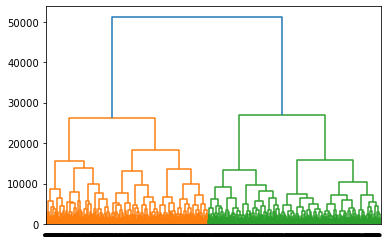

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
mergins = linkage(array, method='complete')
dendrogram(mergins,
           labels=Y,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

## Понижение размерности с методом t-SNE

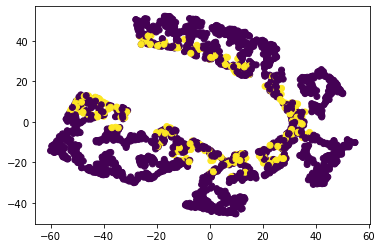

In [12]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

## DBSCAN

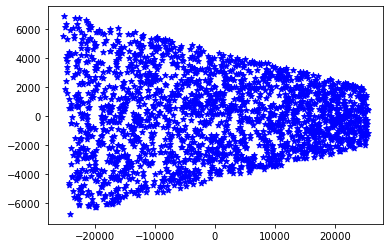

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
dbscan = DBSCAN().fit(X)
pca_2d = PCA(n_components=2).fit_transform(X)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.show()